In [ ]:
#file CSV ประหยัดเนื้อที่น้อบกว่า

In [ ]:
import pandas as pd #อ่าน CSV
from pandas import read_csv

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving xy_data.csv to xy_data.csv


In [ ]:
df=read_csv('xy_data.csv') 

In [ ]:
df.head(10)

,-2.30866206e-01,4.70215484e+00
0,-0.315870,3.032423
1,1.282566,8.535337
2,-0.719616,1.182237
3,1.672241,10.852765
4,-0.876519,3.178062
5,0.211971,2.843536
6,-0.030454,4.740913
7,1.436344,8.248671
8,2.517300,12.581662
9,2.797335,12.702555


In [ ]:
df = read_csv('xy_data.csv',header=None)

In [ ]:
df.head(10)

,0,1
0,-0.230866,4.702155
1,-0.315870,3.032423
2,1.282566,8.535337
3,-0.719616,1.182237
4,1.672241,10.852765
5,-0.876519,3.178062
6,0.211971,2.843536
7,-0.030454,4.740913
8,1.436344,8.248671
9,2.517300,12.581662


In [ ]:
type(df) #check type data ว่า เก็บแบบไหน

pandas.core.frame.DataFrame

# dataframe to data

In [ ]:
data = df.values #มองข้อมูลเป็น object หลายๆส่วน

In [ ]:
#1 เฟรมเก็บเป็น array ภาพ

In [ ]:
data.ndim

2

In [ ]:
data[0:9,0:1] #2D array 1 columb

array([[-0.23086621],
       [-0.31586983],
       [ 1.28256645],
       [-0.71961557],
       [ 1.67224092],
       [-0.87651937],
       [ 0.21197073],
       [-0.0304545 ],
       [ 1.43634441]])

In [ ]:
data[0:9,0] #1D array 

array([-0.23086621, -0.31586983,  1.28256645, -0.71961557,  1.67224092,
       -0.87651937,  0.21197073, -0.0304545 ,  1.43634441])

In [ ]:
data[0:9,0:2] #data n-1

array([[-0.23086621,  4.70215484],
       [-0.31586983,  3.03242253],
       [ 1.28256645,  8.53533726],
       [-0.71961557,  1.18223681],
       [ 1.67224092, 10.8527646 ],
       [-0.87651937,  3.17806194],
       [ 0.21197073,  2.84353617],
       [-0.0304545 ,  4.74091257],
       [ 1.43634441,  8.24867115]])

# สร้าง metric X 
# Colubm 1=X Colubm 2=Y
# คำนวณแบบ Linear agebra


In [ ]:
 x=data[:,0]

In [ ]:
x.shape

(100,)

In [ ]:
x.ndim

1

In [ ]:
x[0:9]

array([-0.23086621, -0.31586983,  1.28256645, -0.71961557,  1.67224092,
       -0.87651937,  0.21197073, -0.0304545 ,  1.43634441])

In [ ]:
y=data[:,1]

In [ ]:
y[0:9]

array([ 4.70215484,  3.03242253,  8.53533726,  1.18223681, 10.8527646 ,
        3.17806194,  2.84353617,  4.74091257,  8.24867115])

# Plot

In [ ]:
import matplotlib.pyplot as plt

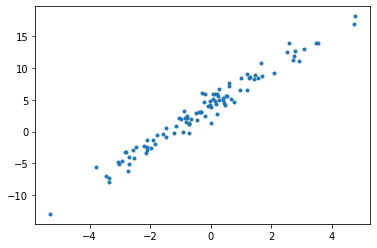

In [ ]:
plt.plot(x,y,'.')

# Find Linear Regression

In [ ]:
import numpy as np

In [ ]:
X=np.c_[np.ones((100,1)),x] #ระบุขนาดของเวกเตอร์

In [ ]:
X.shape

(100, 2)

In [ ]:
X[0:9,:]

array([[ 1.        , -0.23086621],
       [ 1.        , -0.31586983],
       [ 1.        ,  1.28256645],
       [ 1.        , -0.71961557],
       [ 1.        ,  1.67224092],
       [ 1.        , -0.87651937],
       [ 1.        ,  0.21197073],
       [ 1.        , -0.0304545 ],
       [ 1.        ,  1.43634441]])

In [ ]:
theta= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
theta

array([4.09930484, 3.0076354 ])

# สร้าง Hyperplane

In [ ]:
x_new = np.array([[-5],[5]]) 

In [ ]:
X_new =np.c_[np.ones((2,1)),x_new]

In [ ]:
X_new

array([[ 1., -5.],
       [ 1.,  5.]])

In [ ]:
y_predict = X_new.dot(theta)

In [ ]:
y_predict

array([-10.93887214,  19.13748182])

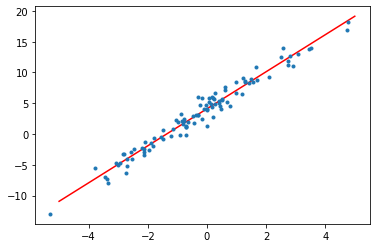

In [ ]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'.')

# วิธีคำนวณแบบ Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression #X ต้องเป็น 2D

In [ ]:
lin_reg = LinearRegression()

# แปลงข้อมูลให้เป็น 2D

In [ ]:
x2=np.array([x]).T

In [ ]:
x2.ndim

2

In [ ]:
lin_reg.fit(x2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_

4.099304839301604

In [ ]:
lin_reg.coef_

array([3.0076354])

In [ ]:
lin_reg.predict(x_new)
y2_predict=lin_reg.predict(x_new)

In [ ]:
y2_predict

array([-10.93887214,  19.13748182])

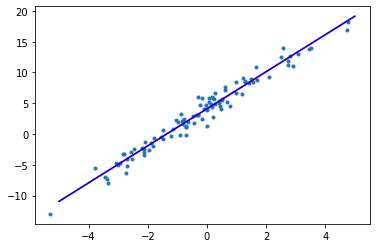

In [ ]:
plt.plot(x,y,'.')
plt.plot(x_new,y_predict,'r-')
plt.plot(x_new,y2_predict,'b-')

# อีก 1 วิธีในการหา

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=100,eta0=0.1)

In [ ]:
sgd_reg.fit(x2,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.06853908]), array([3.068009]))

In [ ]:
sgd_reg.predict(x_new)

array([-11.27150591,  19.40858407])

In [ ]:
sgd_reg_predict = sgd_reg.predict(x_new)

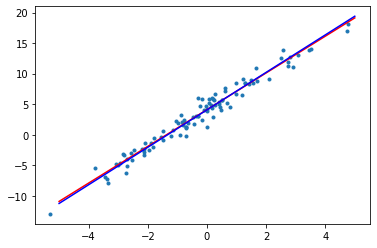

In [ ]:
plt.plot(x,y,'.')
plt.plot(x_new,y_predict,'r-')
plt.plot(x_new,sgd_reg_predict,'b-')